In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Pri-Load_895255.csv")

In [3]:
df

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating(Alpha),ProsperScore,ListingCategory(numeric),...,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Loanoriginationyear,MonthlyLoanPayment,LP_InterestandFees,Investors
0,8/26/2007,36,Completed,8/14/2009,0.16516,0.1580,0.1380,NaN,NaN,0,...,472.0,3083.333333,0,9425,9/12/2007,3,2007,330.43,1971.14,258
1,2/27/2014,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,0.0,6125.000000,0,10000,3/3/2014,1,2014,318.93,0.00,1
2,1/5/2007,36,Completed,12/17/2009,0.28269,0.2750,0.2400,NaN,NaN,0,...,NaN,2083.333333,0,3001,1/17/2007,1,2007,123.32,1185.63,41
3,10/22/2012,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,10056.0,2875.000000,0,10000,11/1/2012,4,2012,321.45,1052.11,158
4,9/14/2013,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,0.0,9583.333333,0,15000,9/20/2013,3,2013,563.97,1256.63,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,2/5/2012,36,Current,NaN,0.24246,0.2049,0.1949,C,7.0,1,...,0.0,4750.000000,0,15000,2/13/2012,1,2012,561.21,4510.85,291
1031,11/30/2013,60,Current,NaN,0.21832,0.1940,0.1840,C,4.0,1,...,0.0,5500.000000,0,5000,12/11/2013,4,2013,130.81,163.97,1
1032,9/27/2008,36,Completed,10/6/2011,0.19855,0.1765,0.1665,NaN,NaN,1,...,0.0,1666.666667,0,5000,10/6/2008,4,2008,179.89,1475.70,176
1033,8/22/2011,60,Current,NaN,0.29371,0.2699,0.2599,D,5.0,2,...,0.0,2681.000000,0,10000,8/30/2011,3,2011,305.29,5777.86,148


In [4]:
df.isnull().sum()

ListingCreationDate            3
Term                           0
LoanStatus                     0
ClosedDate                   556
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
ProsperRating(Alpha)         252
ProsperScore                 252
ListingCategory(numeric)       0
BorrowerState                 52
Occupation                    39
EmploymentStatus              25
AmountDelinquent              81
StatedMonthlyIncome            0
LoanCurrentDaysDelinquent      0
LoanOriginalAmount             0
LoanOriginationDate            0
LoanOriginationQuarter         0
Loanoriginationyear            0
MonthlyLoanPayment             0
LP_InterestandFees             0
Investors                      0
dtype: int64

In [5]:
df['ProsperRating(Alpha)'].fillna(df['ProsperRating(Alpha)'].mode()[0],inplace=True)
df['ProsperScore'].fillna(df['ProsperScore'].mean(),inplace=True)
df['BorrowerState'].fillna(df['BorrowerState'].mode()[0],inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0],inplace=True)
df['AmountDelinquent'].fillna(df['AmountDelinquent'].mean(),inplace=True)
df['ClosedDate'].fillna(pd.to_datetime('2023-07-01'), inplace=True)


In [6]:
df

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating(Alpha),ProsperScore,ListingCategory(numeric),...,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Loanoriginationyear,MonthlyLoanPayment,LP_InterestandFees,Investors
0,8/26/2007,36,Completed,8/14/2009,0.16516,0.1580,0.1380,C,5.896552,0,...,472.000000,3083.333333,0,9425,9/12/2007,3,2007,330.43,1971.14,258
1,2/27/2014,36,Current,2023-07-01 00:00:00,0.12016,0.0920,0.0820,A,7.000000,2,...,0.000000,6125.000000,0,10000,3/3/2014,1,2014,318.93,0.00,1
2,1/5/2007,36,Completed,12/17/2009,0.28269,0.2750,0.2400,C,5.896552,0,...,931.485325,2083.333333,0,3001,1/17/2007,1,2007,123.32,1185.63,41
3,10/22/2012,36,Current,2023-07-01 00:00:00,0.12528,0.0974,0.0874,A,9.000000,16,...,10056.000000,2875.000000,0,10000,11/1/2012,4,2012,321.45,1052.11,158
4,9/14/2013,36,Current,2023-07-01 00:00:00,0.24614,0.2085,0.1985,D,4.000000,2,...,0.000000,9583.333333,0,15000,9/20/2013,3,2013,563.97,1256.63,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,2/5/2012,36,Current,2023-07-01 00:00:00,0.24246,0.2049,0.1949,C,7.000000,1,...,0.000000,4750.000000,0,15000,2/13/2012,1,2012,561.21,4510.85,291
1031,11/30/2013,60,Current,2023-07-01 00:00:00,0.21832,0.1940,0.1840,C,4.000000,1,...,0.000000,5500.000000,0,5000,12/11/2013,4,2013,130.81,163.97,1
1032,9/27/2008,36,Completed,10/6/2011,0.19855,0.1765,0.1665,C,5.896552,1,...,0.000000,1666.666667,0,5000,10/6/2008,4,2008,179.89,1475.70,176
1033,8/22/2011,60,Current,2023-07-01 00:00:00,0.29371,0.2699,0.2599,D,5.000000,2,...,0.000000,2681.000000,0,10000,8/30/2011,3,2011,305.29,5777.86,148


# Add new column Loan_category according to loan amount

In [7]:
df['Loan_category'] = np.select([(df['LoanOriginalAmount'] < 8000), (df['LoanOriginalAmount'] < 16000)], ['Small Loan', 'Medium Loan'], default='High Loan')
df

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating(Alpha),ProsperScore,ListingCategory(numeric),...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Loanoriginationyear,MonthlyLoanPayment,LP_InterestandFees,Investors,Loan_category
0,8/26/2007,36,Completed,8/14/2009,0.16516,0.1580,0.1380,C,5.896552,0,...,3083.333333,0,9425,9/12/2007,3,2007,330.43,1971.14,258,Medium Loan
1,2/27/2014,36,Current,2023-07-01 00:00:00,0.12016,0.0920,0.0820,A,7.000000,2,...,6125.000000,0,10000,3/3/2014,1,2014,318.93,0.00,1,Medium Loan
2,1/5/2007,36,Completed,12/17/2009,0.28269,0.2750,0.2400,C,5.896552,0,...,2083.333333,0,3001,1/17/2007,1,2007,123.32,1185.63,41,Small Loan
3,10/22/2012,36,Current,2023-07-01 00:00:00,0.12528,0.0974,0.0874,A,9.000000,16,...,2875.000000,0,10000,11/1/2012,4,2012,321.45,1052.11,158,Medium Loan
4,9/14/2013,36,Current,2023-07-01 00:00:00,0.24614,0.2085,0.1985,D,4.000000,2,...,9583.333333,0,15000,9/20/2013,3,2013,563.97,1256.63,20,Medium Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,2/5/2012,36,Current,2023-07-01 00:00:00,0.24246,0.2049,0.1949,C,7.000000,1,...,4750.000000,0,15000,2/13/2012,1,2012,561.21,4510.85,291,Medium Loan
1031,11/30/2013,60,Current,2023-07-01 00:00:00,0.21832,0.1940,0.1840,C,4.000000,1,...,5500.000000,0,5000,12/11/2013,4,2013,130.81,163.97,1,Small Loan
1032,9/27/2008,36,Completed,10/6/2011,0.19855,0.1765,0.1665,C,5.896552,1,...,1666.666667,0,5000,10/6/2008,4,2008,179.89,1475.70,176,Small Loan
1033,8/22/2011,60,Current,2023-07-01 00:00:00,0.29371,0.2699,0.2599,D,5.000000,2,...,2681.000000,0,10000,8/30/2011,3,2011,305.29,5777.86,148,Medium Loan


In [8]:
df.isnull().sum()

ListingCreationDate          3
Term                         0
LoanStatus                   0
ClosedDate                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ProsperRating(Alpha)         0
ProsperScore                 0
ListingCategory(numeric)     0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
AmountDelinquent             0
StatedMonthlyIncome          0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
LoanOriginationDate          0
LoanOriginationQuarter       0
Loanoriginationyear          0
MonthlyLoanPayment           0
LP_InterestandFees           0
Investors                    0
Loan_category                0
dtype: int64

# Number of loan  by bringing year

In [9]:
Y = df.groupby(df["Loanoriginationyear"])["Loanoriginationyear"].count().rename('Count').sort_values(ascending=False).to_frame()
Y

,Count
Loanoriginationyear,
2013,340
2012,179
2014,109
2007,102
2008,88
2011,81
2006,59
2010,59
2009,18


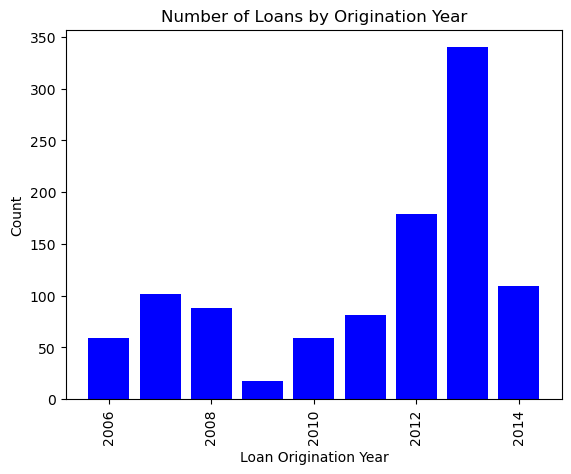

In [10]:
plt.bar(Y.index, Y["Count"], color='blue')
plt.xlabel("Loan Origination Year")
plt.ylabel("Count")
plt.title("Number of Loans by Origination Year")
plt.xticks(rotation=90)
plt.show()

IN 2013 highest number of loan bring

# Number of loan  are completed bring in year

In [11]:
filter=df[(df["LoanStatus"]=="Completed")]
Y_C=filter.groupby(filter["Loanoriginationyear"])["Loanoriginationyear"].count().sort_values(ascending=False).rename("Count").to_frame()
Y_C

,Count
Loanoriginationyear,
2007,63
2008,63
2010,50
2012,45
2011,41
2006,35
2013,18
2009,17


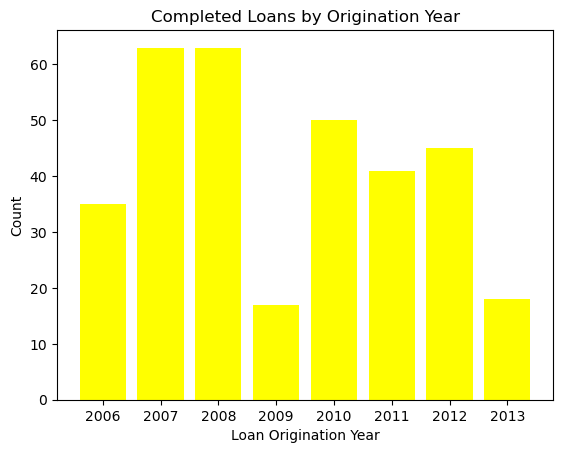

In [12]:
plt.bar(Y_C.index, Y_C["Count"],color="Yellow")
plt.xlabel("Loan Origination Year")
plt.ylabel("Count")
plt.title("Completed Loans by Origination Year")
plt.show()

# Precentage of loan completed in year wise

In [13]:
Y["Percentage"] = ((Y["Count"] - Y_C["Count"]) / Y_C["Count"]) * 100
result = Y.groupby("Loanoriginationyear")["Percentage"].sum().reset_index()
result


,Loanoriginationyear,Percentage
0,2006,68.571429
1,2007,61.904762
2,2008,39.682540
3,2009,5.882353
4,2010,18.000000
5,2011,97.560976
6,2012,297.777778
7,2013,1788.888889
8,2014,0.000000


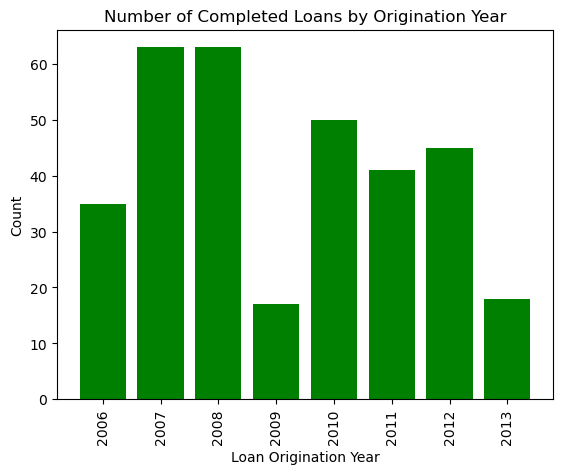

In [14]:
plt.bar(Y_C.index, Y_C["Count"], color='green')
plt.xlabel("Loan Origination Year")
plt.ylabel("Count")
plt.title("Number of Completed Loans by Origination Year")
plt.xticks(rotation=90)
plt.show()

# AVG time required  complete  loan in year by loan_category wise

In [30]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

df['TimeToComplete'] = (df['ClosedDate'] - df['LoanOriginationDate']).dt.days / 365

filter = df[df['LoanStatus'].isin(['Completed', 'Chargedoff'])]
Avg_time_in_year = filter.groupby('Loan_category')['TimeToComplete'].mean().rename('Avg_time').to_frame()
Avg_time_in_year = Avg_time_in_year.round(1)
Avg_time_in_year

,Avg_time
Loan_category,
High Loan,1.9
Medium Loan,1.6
Small Loan,1.6


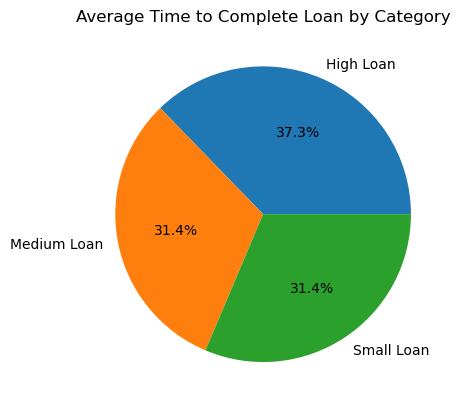

In [31]:
plt.pie(Avg_time_in_year['Avg_time'], labels=Avg_time_in_year.index, autopct='%1.1f%%')
plt.title('Average Time to Complete Loan by Category')
plt.show()

# Count of Loan in different Loan_category

In [18]:
loan_category_count = df.groupby("Loan_category")["Loan_category"].count().to_frame()
loan_category_count

,Loan_category
Loan_category,
High Loan,107
Medium Loan,334
Small Loan,594


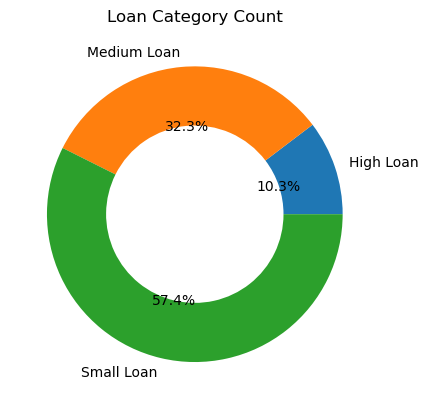

In [19]:
total_count = loan_category_count["Loan_category"].sum()
loan_category_count["Percentage"] = loan_category_count["Loan_category"] / total_count * 100
plt.pie(loan_category_count["Loan_category"], labels=loan_category_count.index, wedgeprops=dict(width=0.4), autopct='%1.1f%%')
plt.title("Loan Category Count")
plt.show()

# Prosper Rating and their avrage prosfer score
 

In [20]:
prosper = df.groupby("ProsperRating(Alpha)")["ProsperScore"].mean().rename("Avg_Prosper_score").sort_values(ascending=False).to_frame()
prosper

,Avg_Prosper_score
ProsperRating(Alpha),
AA,9.301887
A,7.992424
B,6.622378
C,5.638135
D,5.015625
HR,3.739130
E,3.712644


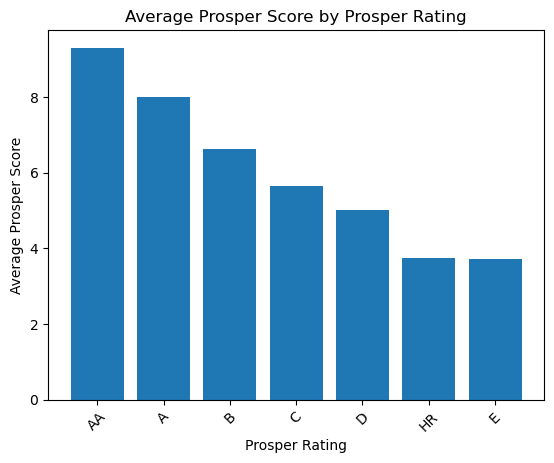

In [21]:
plt.bar(prosper.index, prosper["Avg_Prosper_score"])
plt.title("Average Prosper Score by Prosper Rating")
plt.xlabel("Prosper Rating")
plt.ylabel("Average Prosper Score")
plt.xticks(rotation=45)
plt.show()

# Number of Brower according to EmploymentStatus and thier avg StatedMonthlyIncome

In [22]:
Number_of_borrowers = df.groupby("EmploymentStatus")["EmploymentStatus"].count().rename("Total_borrowers")
Avg_Monthly_income = df.groupby("EmploymentStatus")["StatedMonthlyIncome"].mean().rename("Avg_Monthly_income")

result = pd.concat([Number_of_borrowers, Avg_Monthly_income], axis=1)
result


,Total_borrowers,Avg_Monthly_income
EmploymentStatus,,
Employed,648,6094.009516
Full-time,216,5014.540509
Not available,56,3804.888393
Not employed,10,86.000000
Other,36,3604.831018
Part-time,11,1400.424242
Retired,8,3237.510417
Self-employed,50,7971.875000


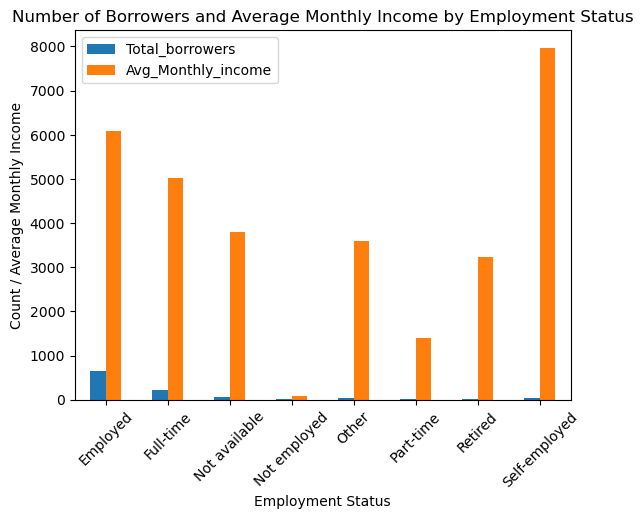

In [23]:
result.plot(kind="bar")
plt.title("Number of Borrowers and Average Monthly Income by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count / Average Monthly Income")
plt.xticks(rotation=45)
plt.show()

# Avg MonthlyLoanPayment according to loan category

In [24]:
Avg_Monthly_Loan_Payment = df.groupby("Loan_category")["MonthlyLoanPayment"].mean().rename("Avg_Monthly_Loan_Payment").reset_index()
Avg_Monthly_Loan_Payment

,Loan_category,Avg_Monthly_Loan_Payment
0,High Loan,661.103645
1,Medium Loan,377.941557
2,Small Loan,148.168855


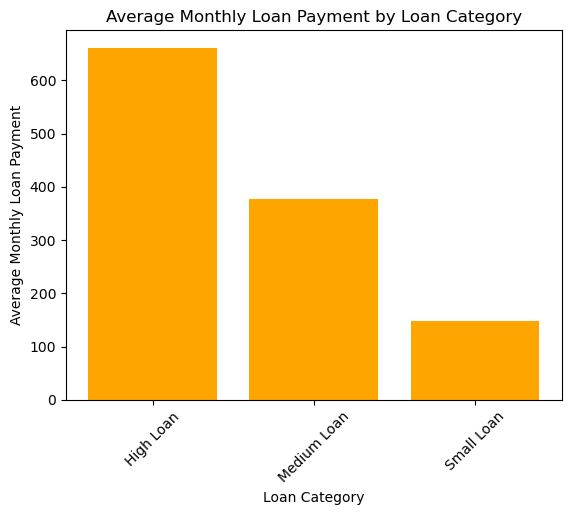

In [25]:
plt.bar(Avg_Monthly_Loan_Payment["Loan_category"], Avg_Monthly_Loan_Payment["Avg_Monthly_Loan_Payment"],color="orange")
plt.title("Average Monthly Loan Payment by Loan Category")
plt.xlabel("Loan Category")
plt.ylabel("Average Monthly Loan Payment")
plt.xticks(rotation=45)
plt.show()

# calculating Total Loan Amount , Total Amount Recovered and precentage of amount recovered

In [26]:
Total_amount_of_loan = df["LoanOriginalAmount"].sum()
Total_amount_of_loan_recovered = df[df['LoanStatus'].isin(['Completed', 'Chargedoff'])]["LoanOriginalAmount"].sum()
percentage_recovered = (Total_amount_of_loan_recovered / Total_amount_of_loan) * 100
print("Total_amount_of_loan:", Total_amount_of_loan)
print("Total_amount_of_loan_recovered:", Total_amount_of_loan_recovered)
print("Percentage recovered:", round(percentage_recovered, 2), "%")

Total_amount_of_loan: 8732095
Total_amount_of_loan_recovered: 2715050
Percentage recovered: 31.09 %


# Total Loan approved year and quarter wise

In [27]:

total = df.groupby(["Loanoriginationyear", "LoanOriginationQuarter"])["LoanOriginalAmount"].sum().reset_index()
total

,Loanoriginationyear,LoanOriginationQuarter,LoanOriginalAmount
0,2006,1,17001
1,2006,2,52700
2,2006,3,86536
3,2006,4,128001
4,2007,1,213326
5,2007,2,192151
6,2007,3,157826
7,2007,4,209250
8,2008,1,91773
9,2008,2,216397


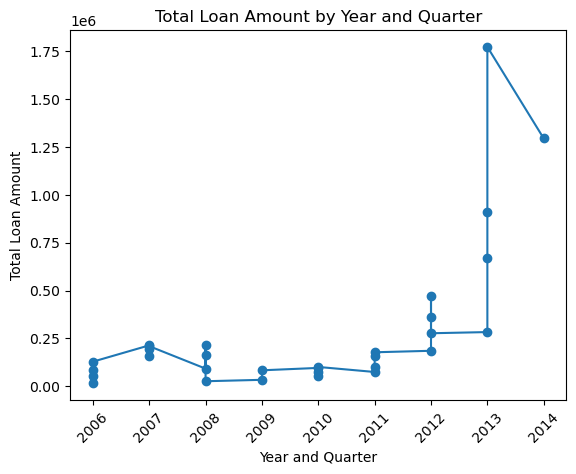

In [28]:
years = total['Loanoriginationyear']
quarters = total['LoanOriginationQuarter']
amounts = total['LoanOriginalAmount']
plt.plot(years, amounts, marker='o')
plt.xlabel('Year and Quarter')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Year and Quarter')
plt.xticks(rotation=45)
plt.show()